# 미국 주식 데이터 분석

---

### 필요 라이브러리 설치하기

In [ ]:
!pip install -r requirement.txt -q

---  

### 주식 데이터 가져와 저장하기

- nasdaq의 주식을 모두 가져옴
- 가져온 데이터는 data 폴더 내에 csv 별로 저장
- dow도 가져오고 싶다면 `dow=True`로 설정

In [ ]:
from dataloader import TickerSaver

ts = TickerSaver(nasdaq=True, dow=False)
ts.save_all_tickers_data()

---

### 저장한 주식 데이터 가져오기

- `min_days`을 사용하여 최소 며칠 이상의 데이터가 존재하는 종목만 가져오도록 설정

In [ ]:
from dataloader import TickerLoader
tl = TickerLoader()
data = tl.get_data(min_days=2500)

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


100%|██████████| 4387/4387 [00:29<00:00, 148.83it/s]


---
### ChatGPT를 이용한 데이터 분석

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent
import os
# from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent


- 발급받은 API KEY 입력

In [ ]:
# os.environ["OPENAI_API_KEY"] = input()
os.environ["OPENAI_API_KEY"] = 'YOUR OPENAI API KEY'

- 사용할 수 있는 모델들: gpt-3.5-turbo, gpt-3.5-turbo-16k, gpt-4, gpt-4-32k 등이 있으며, 토큰 수가 더 많이 제공되는 gpt-3.5-turbo-16k와 gpt-4-32k 모델의 경우 답변이 길어져서 잘리는 경우가 생길 때 사용하면 좋습니다.
- 모델 확인 링크 : https://platform.openai.com/docs/models
- 데이터분석에서는 창의성보다는 정확성이 중요하므로 temperature를 0으로 설정.

In [ ]:
data_backup = data.copy()

In [ ]:
model = ChatOpenAI(model="gpt-4o-mini", temperature=0)
agent = create_pandas_dataframe_agent(
    model,
    data,
    verbose=True,
    agent_type='openai-tools',
    allow_dangerous_code=True,
    max_iterations=10
    )

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")
<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


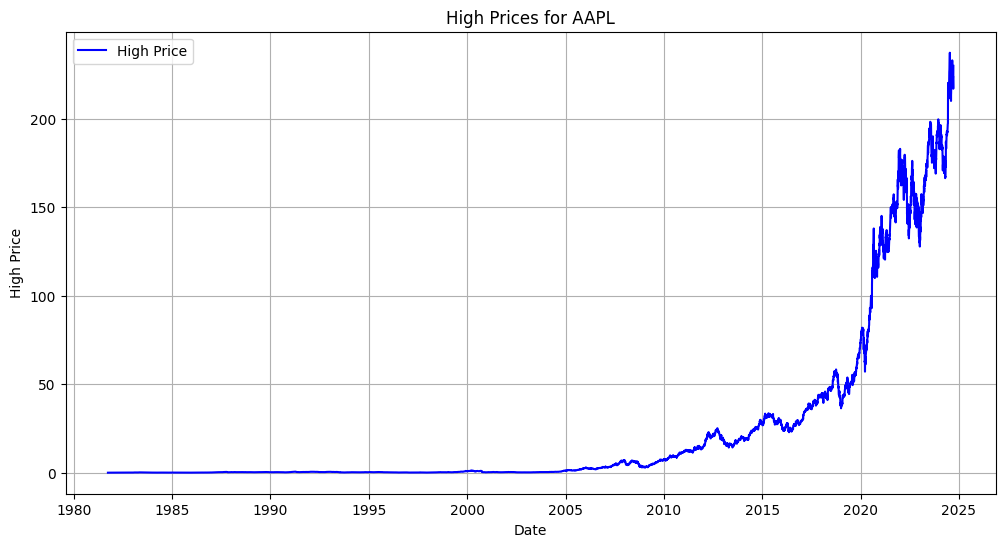


Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Assuming df is already defined and contains the data\n# Filter the dataframe for rows where ticker is 'AAPL'\naapl_data = df[df['ticker'] == 'AAPL']\n\n# Convert the 'Date' column to datetime format for plotting\naapl_data['Date'] = pd.to_datetime(aapl_data['Date'])\n\n# Plotting\nplt.figure(figsize=(12, 6))\nplt.plot(aapl_data['Date'], aapl_data['High'], label='High Price', color='blue')\nplt.title('High Prices for AAPL')\nplt.xlabel('Date')\nplt.ylabel('High Price')\nplt.legend()\nplt.grid()\nplt.show()"}`


The line plot for the "High" prices of the ticker "AAPL" has been generated successfully. If you have any further requests or need additional analysis, feel free to ask!

> Finished chain.


{'input': '\nticker 컬럼의 값이 AAPL인 rows에 대해서 High 컬럼으로 lineplot을 그려줘\n',
 'output': 'The line plot for the "High" prices of the ticker "AAPL" has been generated successfully. If you have any further requests or need additional analysis, feel free to ask!'}

In [ ]:
agent.invoke("""
ticker 컬럼의 값이 AAPL인 rows에 대해서 High 컬럼으로 lineplot을 그려줘
""")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")
<string>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


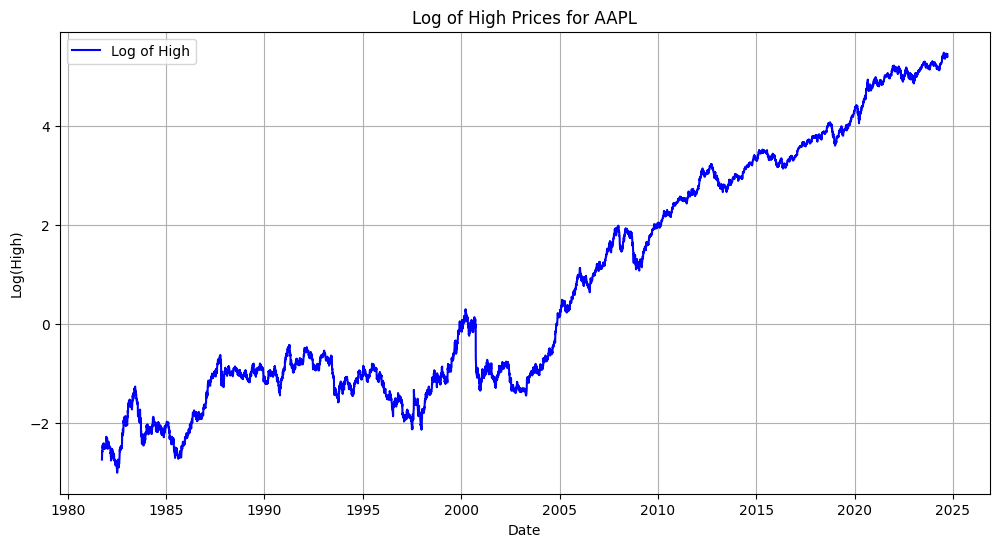


Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Assuming df is already defined\n# Filter the dataframe for rows where ticker is 'AAPL'\naapl_data = df[df['ticker'] == 'AAPL']\n\n# Apply log transformation to the High column\naapl_data['High_log'] = np.log(aapl_data['High'])\n\n# Plotting\nplt.figure(figsize=(12, 6))\nplt.plot(aapl_data['Date'], aapl_data['High_log'], label='Log of High', color='blue')\nplt.title('Log of High Prices for AAPL')\nplt.xlabel('Date')\nplt.ylabel('Log(High)')\nplt.legend()\nplt.grid()\nplt.show()"}`


The line plot for the logarithm of the High prices for the ticker AAPL has been generated successfully. If you have any further requests or need additional analysis, feel free to ask!

> Finished chain.


{'input': '\nticker 컬럼의 값이 AAPL인 rows에 대해서 High 컬럼에 log를 적용해서 lineplot을 그려줘\n',
 'output': 'The line plot for the logarithm of the High prices for the ticker AAPL has been generated successfully. If you have any further requests or need additional analysis, feel free to ask!'}

In [ ]:
agent.invoke("""
ticker 컬럼의 값이 AAPL인 rows에 대해서 High 컬럼에 log를 적용해서 lineplot을 그려줘
""")

In [ ]:
agent.invoke("""
1. ticker 컬럼의 값이 AAPL인 rows에 대해서 최근 3년간의 데이터를 살펴봐
2. 데이터를 살펴보고 매매에 도움이 될 인사이트를 3가지 알려줘
""")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `python_repl_ast` with `{'query': "recent_data = df[df['ticker'] == 'AAPL'].tail(3*252)  # Assuming 252 trading days in a year\nrecent_data"}`


            Date        Open        High         Low       Close   Adj Close  \
10278 2021-09-17  148.820007  148.820007  145.759995  146.059998  143.654419   
10279 2021-09-20  143.800003  144.839996  141.270004  142.940002  140.585815   
10280 2021-09-21  143.929993  144.600006  142.779999  143.429993  141.067703   
10281 2021-09-22  144.449997  146.429993  143.699997  145.850006  143.447891   
10282 2021-09-23  146.649994  147.080002  145.639999  146.830002  144.411774   
...          ...         ...         ...         ...         ...         ...   
11029 2024-09-13  223.580002  224.039993  221.910004  222.500000  222.500000   
11030 2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
11031 2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
11032 2024-09-18  217.550003  222.710007  21

{'input': '\n1. ticker 컬럼의 값이 AAPL인 rows에 대해서 최근 3년간의 데이터를 살펴봐\n2. 데이터를 살펴보고 매매에 도움이 될 인사이트를 3가지 알려줘\n',
 'output': '최근 3년간 AAPL의 데이터는 다음과 같습니다. 이 데이터를 바탕으로 매매에 도움이 될 인사이트를 3가지 제시하겠습니다.\n\n### 최근 3년간 AAPL 데이터 요약\n- **가격 변동**: AAPL의 주가는 2021년 9월 17일에 약 146.06달러에서 시작하여 2024년 9월 19일에는 약 228.61달러로 상승했습니다.\n- **SMA (Simple Moving Average)**: 최근 SMA(5일, 10일, 20일, 50일, 100일, 200일) 값들이 상승세를 보이고 있으며, 이는 주가가 전반적으로 상승하고 있음을 나타냅니다.\n- **RSI (Relative Strength Index)**: 최근 RSI 값은 60을 초과하는 경우가 많아 과매수 상태에 가까워지고 있습니다. 이는 주가가 상승세를 유지하고 있지만, 조정이 필요할 수 있음을 시사합니다.\n\n### 매매에 도움이 될 인사이트\n1. **상승 추세 확인**: AAPL의 SMA 값들이 상승하고 있으며, 이는 주가가 지속적으로 상승하고 있음을 나타냅니다. 따라서, 상승 추세가 지속될 가능성이 높아 보이며, 매수 기회를 고려할 수 있습니다.\n\n2. **과매수 신호**: RSI 값이 60을 초과하는 경우가 많아 과매수 상태에 가까워지고 있습니다. 이는 단기적인 조정이 있을 수 있음을 의미하므로, 매도 신호로 해석할 수 있습니다. 따라서, 매수 후 일정 수익을 실현하는 전략이 필요할 수 있습니다.\n\n3. **볼린저 밴드 활용**: 볼린저 밴드의 상한선(BB_upper)과 하한선(BB_lower)을 활용하여 가격의 변동성을 분석할 수 있습니다. 현재 주가가 BB_upper에 가까워지고 있다면, 가격 조정이 있을 가능성이 높으므로 매도 전략을 고려할 수 있습니다.\n\n이러한 인사이

In [ ]:
agent.invoke("""
1. 데이터를 살펴보고 1순위로 바로 구매해야 할 ticker를 알려줘
2. 1순위로 뽑은 이유 3가지를 알려줘
""")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `python_repl_ast` with `{'query': 'df.head()'}`


          Date  Open      High       Low     Close  Adj Close  Volume  \
199 1987-04-15   0.0  2.083333  2.000000  2.083333   1.738029   88200   
200 1987-04-16   0.0  2.062500  2.000000  2.062500   1.720649   15600   
201 1987-04-20   0.0  2.166667  2.000000  2.166667   1.807551    4800   
202 1987-04-21   0.0  2.000000  2.000000  2.000000   1.668508    1200   
203 1987-04-22   0.0  2.166667  2.166667  2.166667   1.807551    1200   

        SMA_5    SMA_10    SMA_20    SMA_50   SMA_100   SMA_200     RSI_14  \
199  2.020833  2.022917  2.012500  2.067500  1.840417  1.718750  55.845123   
200  2.029167  2.029167  2.017708  2.068333  1.846458  1.720312  53.812805   
201  2.062500  2.045833  2.021875  2.067917  1.853542  1.722396  61.380675   
202  2.062500  2.041667  2.023958  2.063750  1.858958  1.721979  47.866539   
203  2.095833  2.045833  2.034375  2.062083  1.866042  1.722187  57.858511   

         MACD  MACD_signal  MAC

{'input': '\n1. 데이터를 살펴보고 1순위로 바로 구매해야 할 ticker를 알려줘\n2. 1순위로 뽑은 이유 3가지를 알려줘\n',
 'output': '1. **1순위로 바로 구매해야 할 ticker**: **VBFC**\n\n2. **1순위로 뽑은 이유**:\n   - **높은 RSI 값**: VBFC의 RSI(상대 강도 지수)가 92.01로 매우 높습니다. 일반적으로 RSI가 70 이상이면 과매수 상태로 간주되지만, 90 이상은 매우 강한 상승세를 나타냅니다.\n   - **MACD 신호**: VBFC의 MACD가 0.76209로 양수이며, MACD 신호선(0.568302)보다 높습니다. 이는 강한 상승 모멘텀을 나타내며, 매수 신호로 해석될 수 있습니다.\n   - **SMA(단순 이동 평균) 상승**: VBFC의 SMA(5, 10, 20, 50, 100, 200)가 모두 상승세를 보이고 있습니다. 이는 가격이 지속적으로 상승하고 있음을 나타내며, 긍정적인 추세를 반영합니다.'}

**1순위로 바로 구매해야 할 ticker**: **VBFC**

2. **1순위로 뽑은 이유**:
   - **높은 RSI 값**: VBFC의 RSI(상대 강도 지수)가 92.01로 매우 높습니다. 일반적으로 RSI가 70 이상이면 과매수 상태로 간주되지만, 90 이상은 매우 강한 상승세를 나타냅니다.
   - **MACD 신호**: VBFC의 MACD가 0.76209로 양수이며, MACD 신호선(0.568302)보다 높습니다. 이는 강한 상승 모멘텀을 나타내며, 매수 신호로 해석될 수 있습니다.
   - **SMA(단순 이동 평균) 상승**: VBFC의 SMA(5, 10, 20, 50, 100, 200)가 모두 상승세를 보이고 있습니다. 이는 가격이 지속적으로 상승하고 있음을 나타내며, 긍정적인 추세를 반영합니다.


---

### 골든크로스, 데드크로스 찾기
- 전일과 현재를 비교해야하므로 전일의 보조지표 컬럼 생성

In [ ]:
prev_cols = ['SMA_5', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'RSI_14', 'MACD', 'MACD_signal']
for col in prev_cols:
    data[f"Prev_{col}"] = data[col].shift(1)

- 데드크로스, 콜든크로스가 발생한 ticker를 찾기위한 함수 선언
- `target1`, `target2` 를 바꿔가며 설정 가능
- `prev_days`를 사용하여 며칠 내에 크로스가 발생한 ticker를 찾을건지 설정 가능

In [ ]:
from datetime import timedelta

def find_death_cross(df, target1="SMA_20", target2="SMA_50", prev_days=365):
    one_year_ago = df['Date'].max() - timedelta(days=prev_days)
    dead_cross_rows = df[
        (df['Date'] >= one_year_ago) &
        (df[f'Prev_{target1}'] > df[f'Prev_{target2}']) &
        (df[target1] < df[target2])
        ]
    return dead_cross_rows

def find_golden_cross(df, target1="SMA_20", target2="SMA_50", prev_days=365):
    one_year_ago = df['Date'].max() - timedelta(days=prev_days)
    golden_cross_rows = df[
        (df['Date'] >= one_year_ago) &
        (df[f'Prev_{target1}'] < df[f'Prev_{target2}']) &
        (df[target1] > df[target2])
        ]
    return golden_cross_rows


In [ ]:
target1 = "SMA_20"
target2 = "SMA_100"
t = find_death_cross(data, target1, target2)
dead_cross_vc = t.ticker.value_counts().index

In [ ]:
temp = data[data.ticker == dead_cross_vc[0]][-500:]

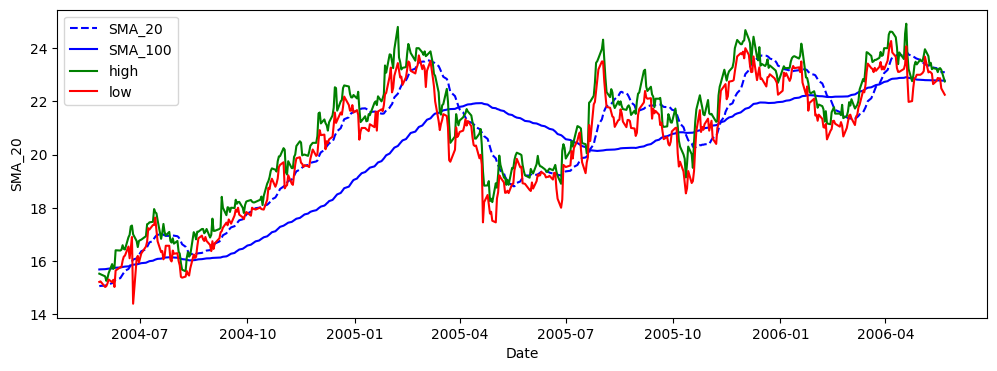

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
sns.lineplot(
    data=temp,
    x="Date",
    y=target1,
    label=target1,
    color='b',
    linestyle='--'
)
sns.lineplot(
    data=temp,
    x="Date",
    y=target2,
    label=target2,
    c='b'
)
sns.lineplot(
    data=temp,
    x="Date",
    y="High",
    label="high",
    color="g"
)
sns.lineplot(
    data=temp,
    x="Date",
    y="Low",
    label="low",
    color="r"
)
plt.show()